<a href="https://colab.research.google.com/github/rounak-roy-2025/Finance101/blob/rounak-roy-2025-qf/TechnicalScreenTestProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIFTY 500 TECHNICAL ANALYSIS SYSTEM

Analyzing 20 stocks...
[1/20] Analyzing RELIANCE... ✓ Signal: 25/100
[2/20] Analyzing TCS... ✓ Signal: 10/100
[3/20] Analyzing HDFCBANK... ✓ Signal: 45/100
[4/20] Analyzing INFY... ✓ Signal: 10/100
[5/20] Analyzing ICICIBANK... ✓ Signal: 20/100
[6/20] Analyzing HINDUNILVR... ✓ Signal: 50/100
[7/20] Analyzing ITC... ✓ Signal: 20/100
[8/20] Analyzing SBIN... ✓ Signal: 35/100
[9/20] Analyzing BHARTIARTL... ✓ Signal: 50/100
[10/20] Analyzing KOTAKBANK... ✓ Signal: 25/100
[11/20] Analyzing LT... ✓ Signal: 25/100
[12/20] Analyzing AXISBANK... ✓ Signal: 25/100
[13/20] Analyzing ASIANPAINT... ✓ Signal: 50/100
[14/20] Analyzing MARUTI... ✓ Signal: 25/100
[15/20] Analyzing SUNPHARMA... ✓ Signal: 15/100
[16/20] Analyzing TITAN... ✓ Signal: 25/100
[17/20] Analyzing BAJFINANCE... ✓ Signal: 15/100
[18/20] Analyzing HCLTECH... ✓ Signal: 25/100
[19/20] Analyzing ULTRACEMCO... ✓ Signal: 40/100
[20/20] Analyzing NESTLEIND... ✓ Signal: 15/100

TOP BUYING OPPORTUNITIES

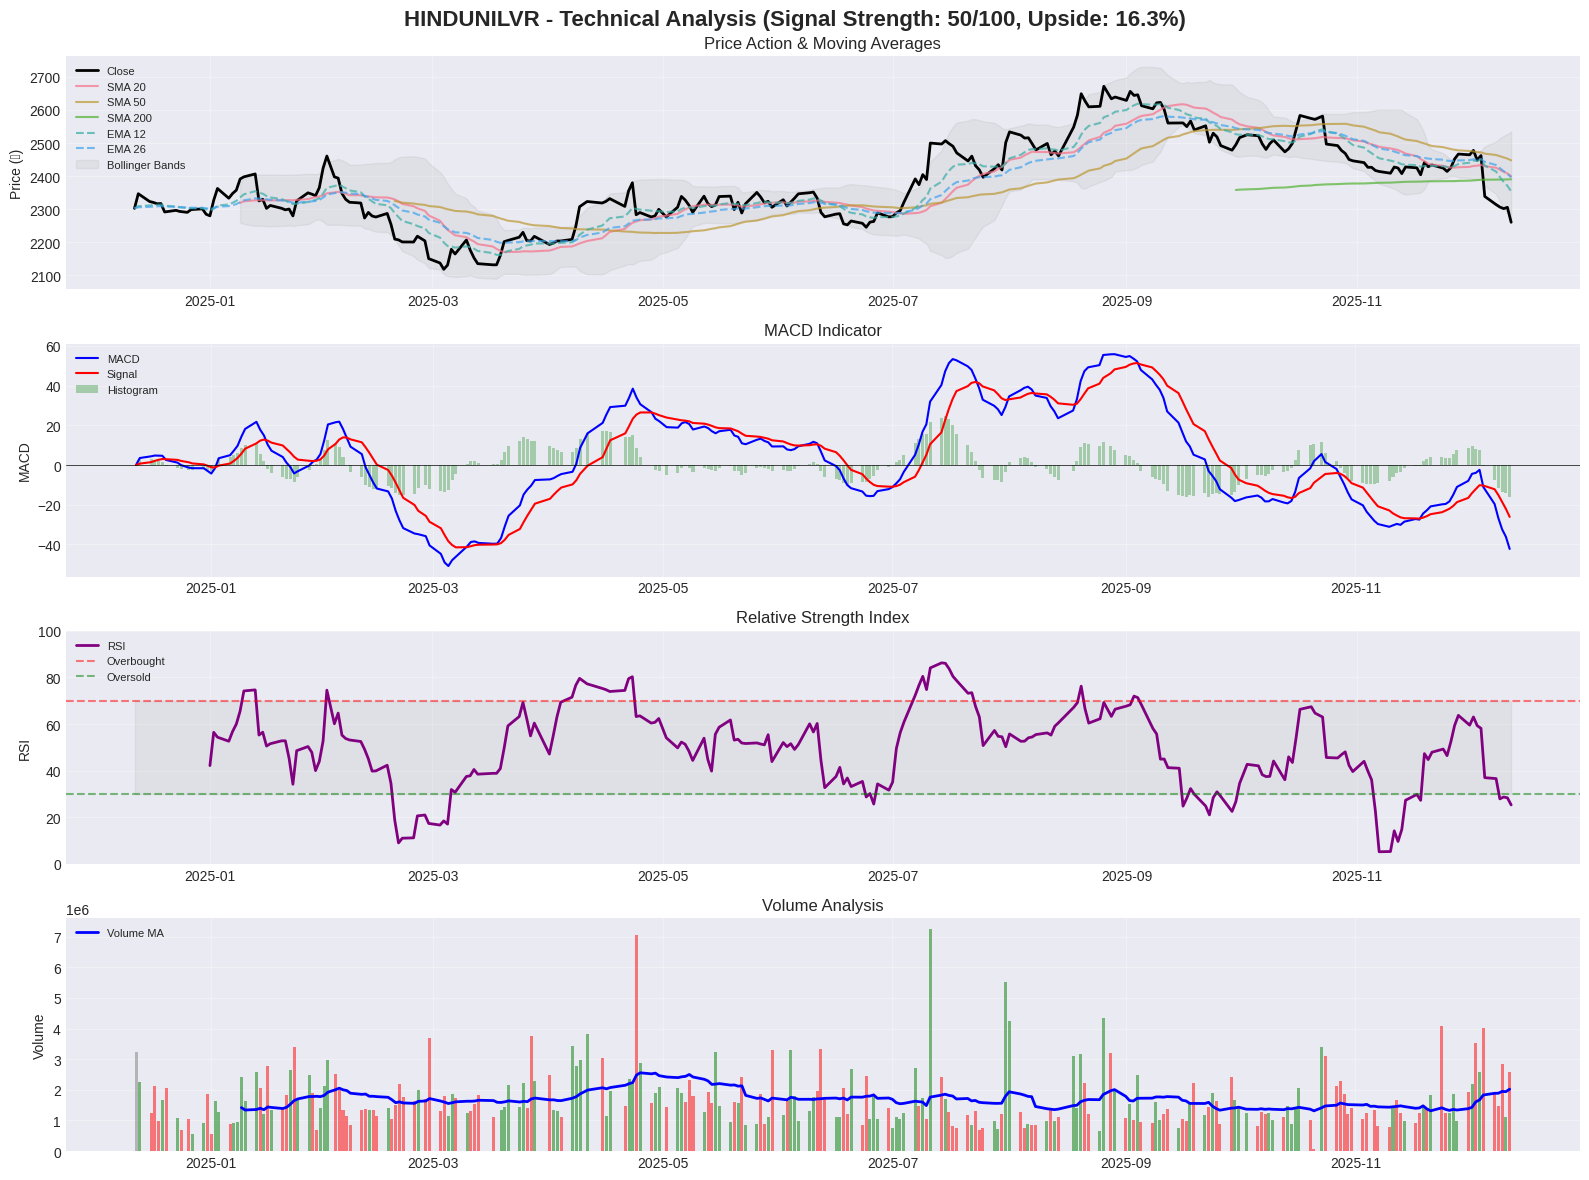

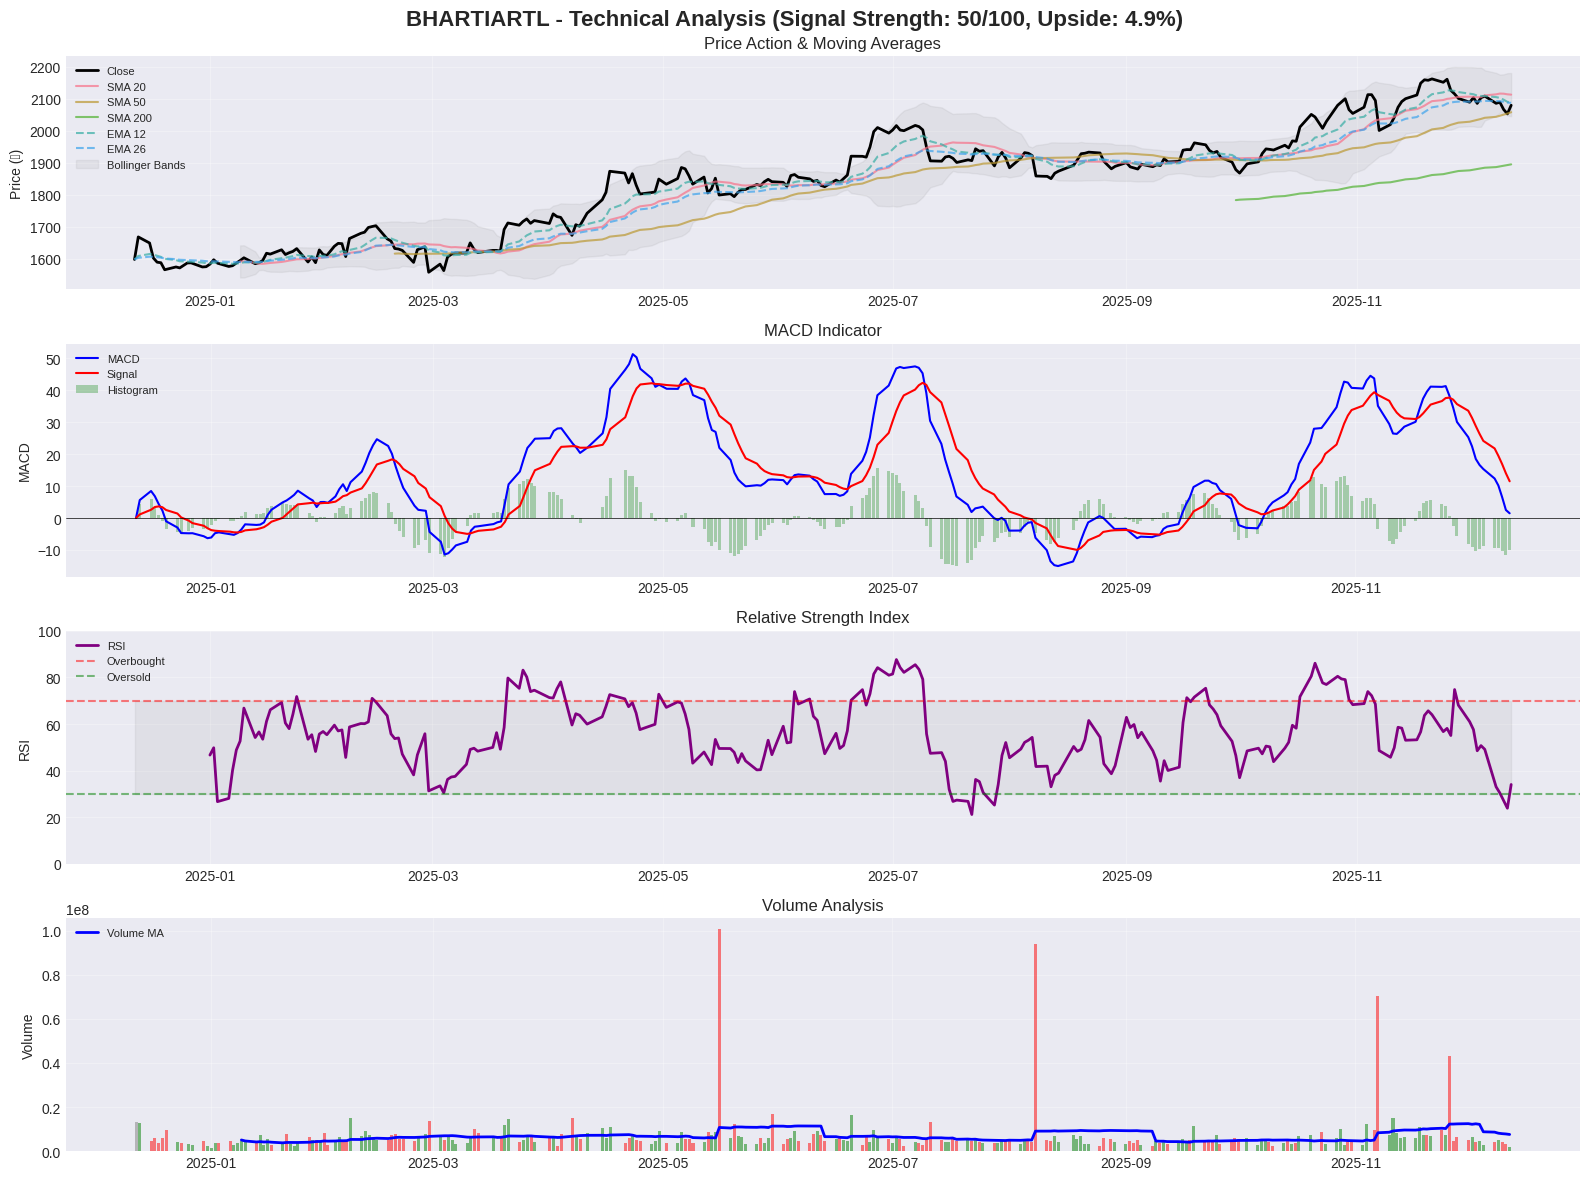

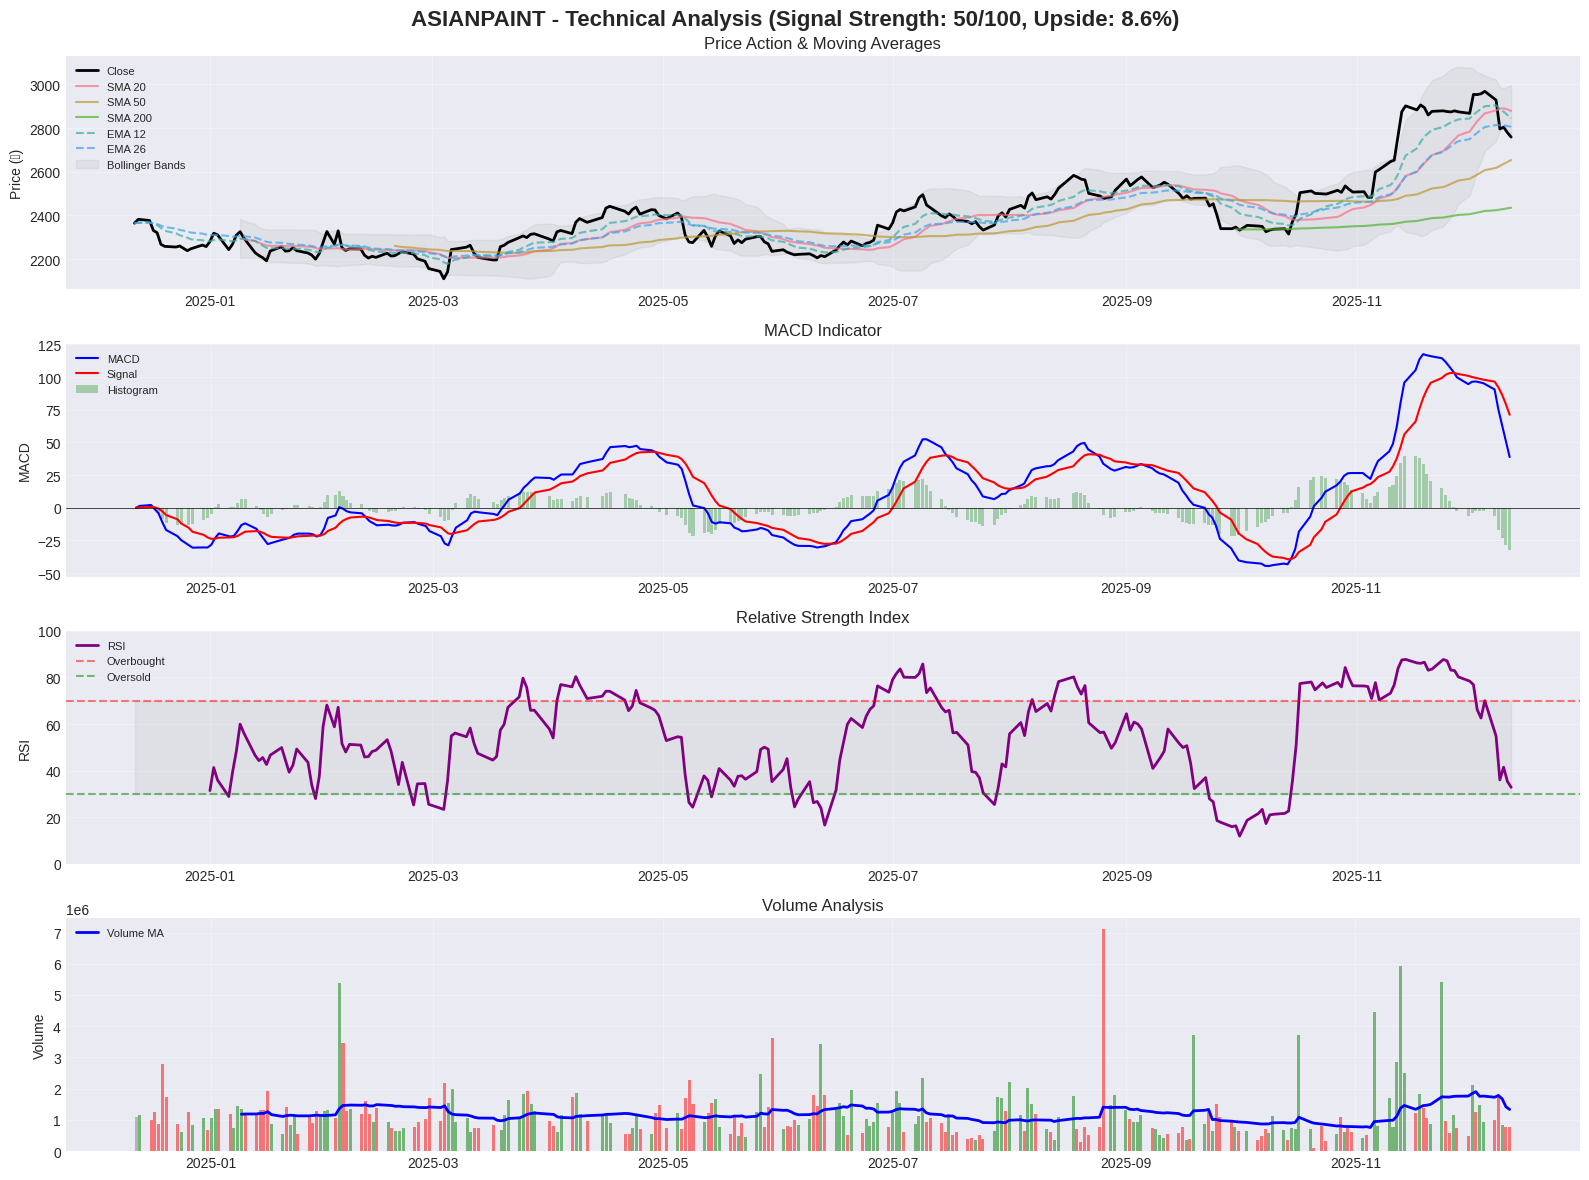

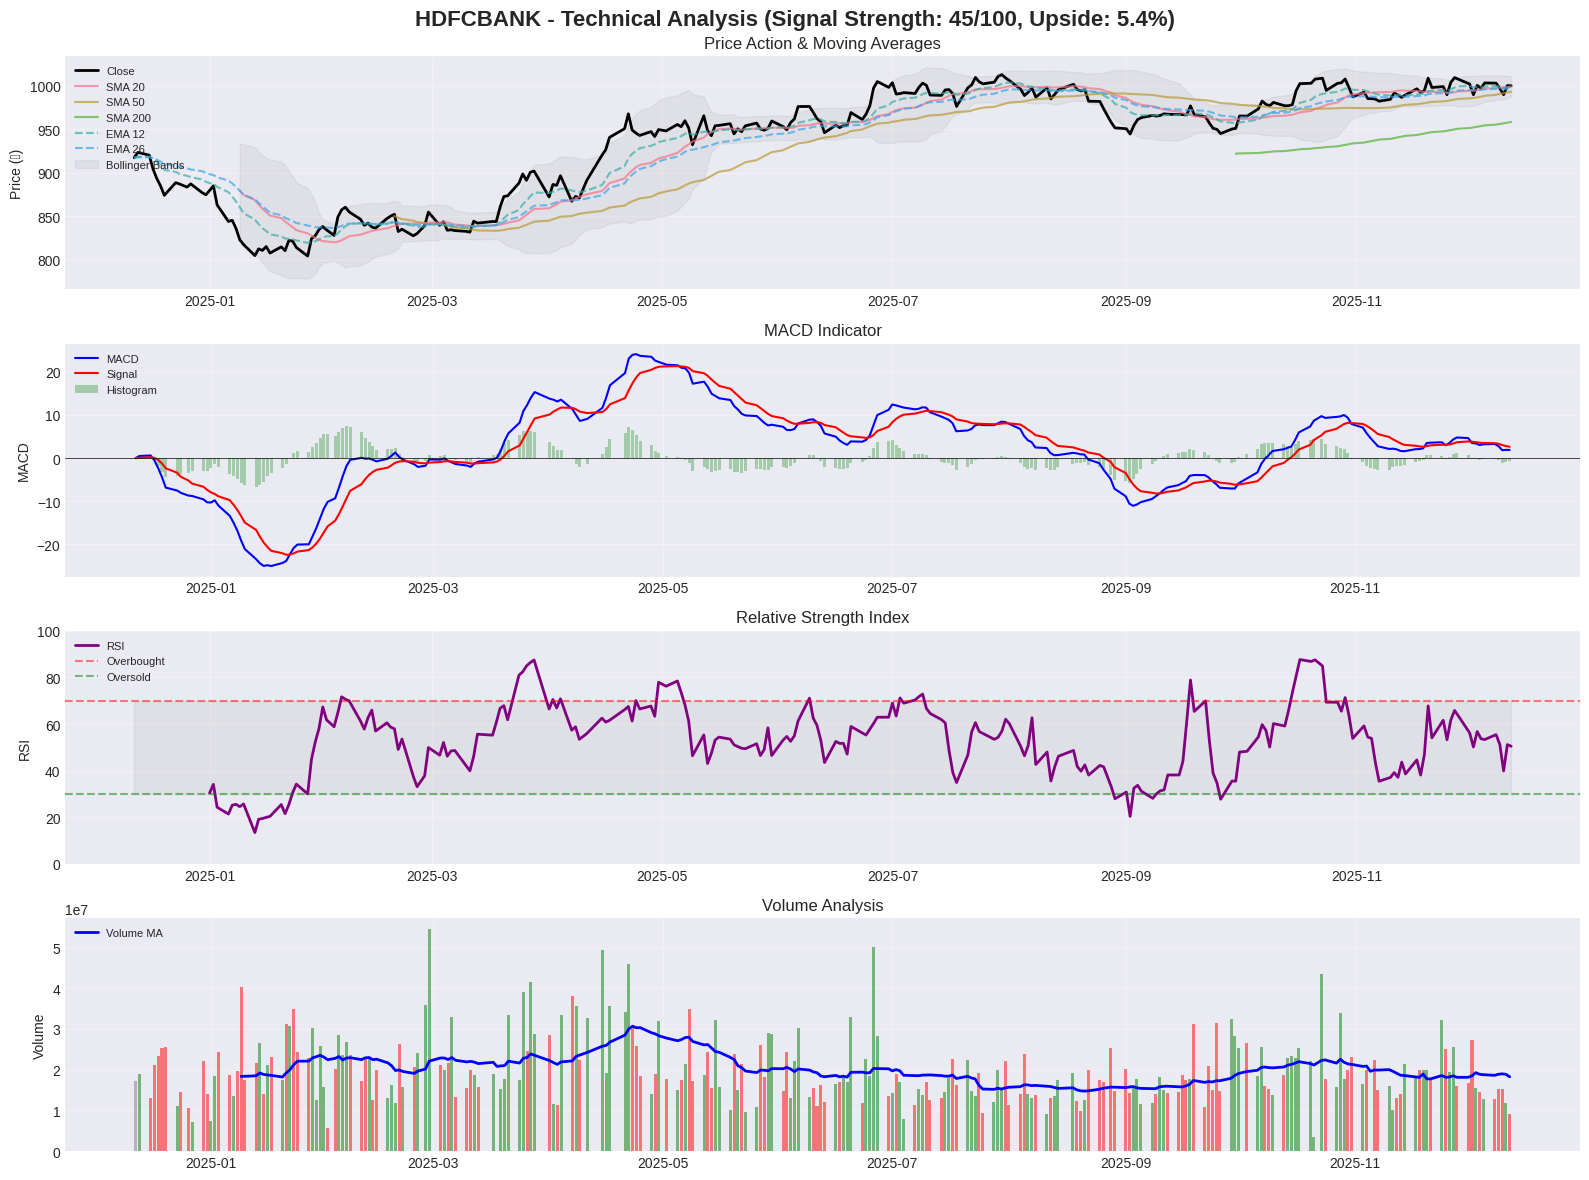

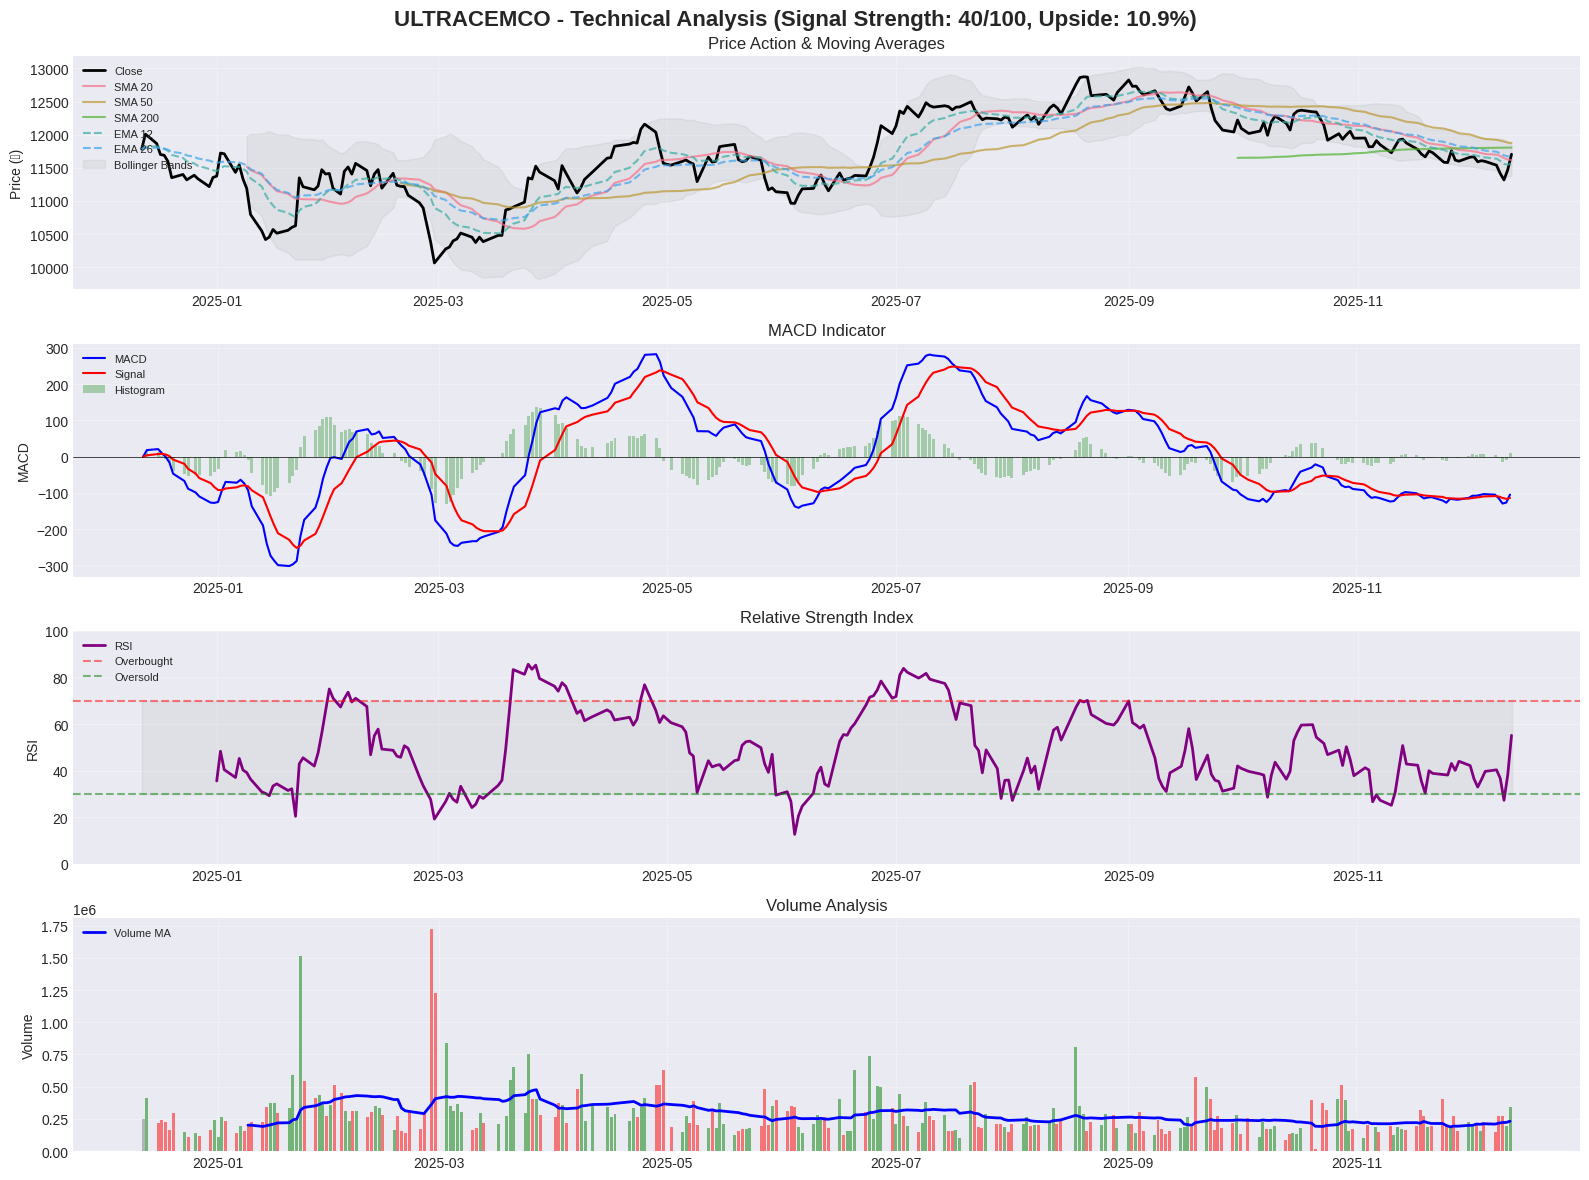


BACKTESTING RESULTS
    Ticker Total_Return Final_Capital  Num_Trades Win_Rate
HINDUNILVR       -4.60%       ₹95,396          13    30.8%
BHARTIARTL        3.19%      ₹103,191           3    66.7%
ASIANPAINT        0.96%      ₹100,957           3    66.7%
  HDFCBANK        1.91%      ₹101,911           2    50.0%
ULTRACEMCO        1.46%      ₹101,456          16    50.0%

ANALYSIS COMPLETE


In [ ]:
# NIFTY 500 Technical Analysis & Backtesting System
# Run this in Google Colab

# Install required packages
!pip install yfinance pandas numpy matplotlib seaborn ta-lib -q

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class TechnicalAnalyzer:
    def __init__(self, period='1y'):
        self.period = period
        self.results = []

    def calculate_indicators(self, df):
        """Calculate technical indicators"""
        # Simple Moving Averages
        df['SMA_20'] = df['Close'].rolling(window=20).mean()
        df['SMA_50'] = df['Close'].rolling(window=50).mean()
        df['SMA_200'] = df['Close'].rolling(window=200).mean()

        # Exponential Moving Averages
        df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
        df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
        df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

        # Bollinger Bands
        df['BB_Middle'] = df['Close'].rolling(window=20).mean()
        bb_std = df['Close'].rolling(window=20).std()
        df['BB_Upper'] = df['BB_Middle'] + (bb_std * 2)
        df['BB_Lower'] = df['BB_Middle'] - (bb_std * 2)
        df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

        # MACD
        df['MACD'] = df['EMA_12'] - df['EMA_26']
        df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
        df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

        # RSI
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # Volume MA
        df['Volume_MA'] = df['Volume'].rolling(window=20).mean()

        return df

    def identify_signals(self, df):
        """Identify buying opportunities"""
        latest = df.iloc[-1]
        prev = df.iloc[-2]

        signals = {
            'ema_crossover': latest['EMA_12'] > latest['EMA_26'] and prev['EMA_12'] <= prev['EMA_26'],
            'sma_golden_cross': latest['SMA_50'] > latest['SMA_200'],
            'price_above_sma20': latest['Close'] > latest['SMA_20'],
            'bb_lower_touch': latest['Close'] <= latest['BB_Lower'] * 1.02,
            'rsi_oversold': latest['RSI'] < 35,
            'macd_bullish': latest['MACD'] > latest['MACD_Signal'] and prev['MACD'] <= prev['MACD_Signal'],
            'volume_surge': latest['Volume'] > latest['Volume_MA'] * 1.5
        }

        # Calculate signal strength (0-100)
        signal_strength = sum([
            signals['ema_crossover'] * 20,
            signals['sma_golden_cross'] * 15,
            signals['price_above_sma20'] * 10,
            signals['bb_lower_touch'] * 20,
            signals['rsi_oversold'] * 15,
            signals['macd_bullish'] * 15,
            signals['volume_surge'] * 5
        ])

        # Calculate upside potential
        resistance = max(latest['BB_Upper'], latest['SMA_200'] * 1.1)
        upside_potential = ((resistance - latest['Close']) / latest['Close']) * 100

        return signals, signal_strength, upside_potential

    def plot_stock_analysis(self, ticker, df, signals, signal_strength, upside_potential):
        """Create comprehensive chart for a stock"""
        fig, axes = plt.subplots(4, 1, figsize=(16, 12))
        fig.suptitle(f'{ticker} - Technical Analysis (Signal Strength: {signal_strength:.0f}/100, Upside: {upside_potential:.1f}%)',
                     fontsize=16, fontweight='bold')

        # Price and Moving Averages
        ax1 = axes[0]
        ax1.plot(df.index, df['Close'], label='Close', linewidth=2, color='black')
        ax1.plot(df.index, df['SMA_20'], label='SMA 20', alpha=0.7)
        ax1.plot(df.index, df['SMA_50'], label='SMA 50', alpha=0.7)
        ax1.plot(df.index, df['SMA_200'], label='SMA 200', alpha=0.7)
        ax1.plot(df.index, df['EMA_12'], label='EMA 12', linestyle='--', alpha=0.7)
        ax1.plot(df.index, df['EMA_26'], label='EMA 26', linestyle='--', alpha=0.7)
        ax1.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.1, color='gray', label='Bollinger Bands')
        ax1.set_ylabel('Price (₹)')
        ax1.legend(loc='upper left', fontsize=8)
        ax1.grid(True, alpha=0.3)
        ax1.set_title('Price Action & Moving Averages')

        # MACD
        ax2 = axes[1]
        ax2.plot(df.index, df['MACD'], label='MACD', color='blue')
        ax2.plot(df.index, df['MACD_Signal'], label='Signal', color='red')
        ax2.bar(df.index, df['MACD_Hist'], label='Histogram', alpha=0.3, color='green')
        ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax2.set_ylabel('MACD')
        ax2.legend(loc='upper left', fontsize=8)
        ax2.grid(True, alpha=0.3)
        ax2.set_title('MACD Indicator')

        # RSI
        ax3 = axes[2]
        ax3.plot(df.index, df['RSI'], label='RSI', color='purple', linewidth=2)
        ax3.axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought')
        ax3.axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold')
        ax3.fill_between(df.index, 30, 70, alpha=0.1, color='gray')
        ax3.set_ylabel('RSI')
        ax3.set_ylim(0, 100)
        ax3.legend(loc='upper left', fontsize=8)
        ax3.grid(True, alpha=0.3)
        ax3.set_title('Relative Strength Index')

        # Volume
        ax4 = axes[3]
        colors = ['green' if df['Close'].iloc[i] > df['Close'].iloc[i-1] else 'red'
                  for i in range(1, len(df))]
        colors.insert(0, 'gray')
        ax4.bar(df.index, df['Volume'], color=colors, alpha=0.5)
        ax4.plot(df.index, df['Volume_MA'], label='Volume MA', color='blue', linewidth=2)
        ax4.set_ylabel('Volume')
        ax4.legend(loc='upper left', fontsize=8)
        ax4.grid(True, alpha=0.3)
        ax4.set_title('Volume Analysis')

        plt.tight_layout()
        return fig

    def analyze_stock(self, ticker):
        """Analyze a single stock"""
        try:
            # Add .NS for NSE stocks
            symbol = f"{ticker}.NS"
            stock = yf.Ticker(symbol)
            df = stock.history(period=self.period)

            if len(df) < 200:
                return None

            df = self.calculate_indicators(df)
            signals, signal_strength, upside_potential = self.identify_signals(df)

            latest = df.iloc[-1]

            result = {
                'Ticker': ticker,
                'Current_Price': latest['Close'],
                'Signal_Strength': signal_strength,
                'Upside_Potential': upside_potential,
                'RSI': latest['RSI'],
                'MACD_Bullish': signals['macd_bullish'],
                'EMA_Crossover': signals['ema_crossover'],
                'BB_Touch': signals['bb_lower_touch'],
                'Golden_Cross': signals['sma_golden_cross'],
                'Volume_Surge': signals['volume_surge'],
                'df': df,
                'signals': signals
            }

            return result

        except Exception as e:
            print(f"Error analyzing {ticker}: {str(e)}")
            return None

class Backtester:
    def __init__(self, initial_capital=100000):
        self.initial_capital = initial_capital
        self.results = []

    def backtest_strategy(self, df, signal_strength_threshold=50):
        """Backtest the trading strategy"""
        capital = self.initial_capital
        position = 0
        trades = []

        for i in range(200, len(df)):
            current = df.iloc[i]
            prev = df.iloc[i-1]

            # Buy signal
            if position == 0:
                buy_signal = (
                    (current['EMA_12'] > current['EMA_26'] and prev['EMA_12'] <= prev['EMA_26']) or
                    (current['Close'] <= current['BB_Lower'] * 1.02 and current['RSI'] < 40) or
                    (current['MACD'] > current['MACD_Signal'] and prev['MACD'] <= prev['MACD_Signal'])
                )

                if buy_signal:
                    position = capital / current['Close']
                    buy_price = current['Close']
                    buy_date = current.name
                    capital = 0

            # Sell signal
            elif position > 0:
                sell_signal = (
                    (current['Close'] >= buy_price * 1.10) or  # 10% profit target
                    (current['Close'] <= buy_price * 0.95) or  # 5% stop loss
                    (current['RSI'] > 70) or
                    (current['EMA_12'] < current['EMA_26'])
                )

                if sell_signal:
                    capital = position * current['Close']
                    profit = ((current['Close'] - buy_price) / buy_price) * 100

                    trades.append({
                        'Buy_Date': buy_date,
                        'Buy_Price': buy_price,
                        'Sell_Date': current.name,
                        'Sell_Price': current['Close'],
                        'Profit_Pct': profit,
                        'Hold_Days': (current.name - buy_date).days
                    })

                    position = 0

        # Close any open position
        if position > 0:
            capital = position * df.iloc[-1]['Close']

        total_return = ((capital - self.initial_capital) / self.initial_capital) * 100

        return {
            'trades': trades,
            'total_return': total_return,
            'final_capital': capital,
            'num_trades': len(trades),
            'win_rate': len([t for t in trades if t['Profit_Pct'] > 0]) / len(trades) * 100 if trades else 0
        }

# Main execution
def main():
    print("=" * 80)
    print("NIFTY 500 TECHNICAL ANALYSIS SYSTEM")
    print("=" * 80)

    # Get NIFTY 500 tickers (sample list - you can expand this)
    # Full list available at: https://www.niftyindices.com/
    nifty500_sample = [
        'RELIANCE', 'TCS', 'HDFCBANK', 'INFY', 'ICICIBANK',
        'HINDUNILVR', 'ITC', 'SBIN', 'BHARTIARTL', 'KOTAKBANK',
        'LT', 'AXISBANK', 'ASIANPAINT', 'MARUTI', 'SUNPHARMA',
        'TITAN', 'BAJFINANCE', 'HCLTECH', 'ULTRACEMCO', 'NESTLEIND'
    ]

    analyzer = TechnicalAnalyzer(period='1y')

    print(f"\nAnalyzing {len(nifty500_sample)} stocks...")
    results = []

    for i, ticker in enumerate(nifty500_sample, 1):
        print(f"[{i}/{len(nifty500_sample)}] Analyzing {ticker}...", end=' ')
        result = analyzer.analyze_stock(ticker)
        if result:
            results.append(result)
            print(f"✓ Signal: {result['Signal_Strength']:.0f}/100")
        else:
            print("✗ Failed")

    # Sort by signal strength
    results.sort(key=lambda x: x['Signal_Strength'], reverse=True)

    # Create summary DataFrame
    summary_df = pd.DataFrame([{
        'Ticker': r['Ticker'],
        'Price': f"₹{r['Current_Price']:.2f}",
        'Signal_Strength': f"{r['Signal_Strength']:.0f}/100",
        'Upside_Potential': f"{r['Upside_Potential']:.1f}%",
        'RSI': f"{r['RSI']:.1f}",
        'MACD_✓': '✓' if r['MACD_Bullish'] else '✗',
        'EMA_Cross': '✓' if r['EMA_Crossover'] else '✗',
        'BB_Touch': '✓' if r['BB_Touch'] else '✗'
    } for r in results])

    print("\n" + "=" * 80)
    print("TOP BUYING OPPORTUNITIES")
    print("=" * 80)
    print(summary_df.head(10).to_string(index=False))

    # Plot top 5 opportunities
    print(f"\nGenerating charts for top 5 opportunities...")
    top_5 = results[:5]

    for r in top_5:
        fig = analyzer.plot_stock_analysis(
            r['Ticker'], r['df'], r['signals'],
            r['Signal_Strength'], r['Upside_Potential']
        )
        plt.show()

    # Backtesting
    print("\n" + "=" * 80)
    print("BACKTESTING RESULTS")
    print("=" * 80)

    backtester = Backtester(initial_capital=100000)
    backtest_results = []

    for r in top_5:
        bt_result = backtester.backtest_strategy(r['df'])
        backtest_results.append({
            'Ticker': r['Ticker'],
            'Total_Return': f"{bt_result['total_return']:.2f}%",
            'Final_Capital': f"₹{bt_result['final_capital']:,.0f}",
            'Num_Trades': bt_result['num_trades'],
            'Win_Rate': f"{bt_result['win_rate']:.1f}%"
        })

    bt_df = pd.DataFrame(backtest_results)
    print(bt_df.to_string(index=False))

    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETE")
    print("=" * 80)

# Run the analysis
if __name__ == "__main__":
    main()